# Librerias

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [41]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier

seed = 42

# Lectura

In [2]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

In [5]:
X_train.head()

,no_of_weekend_nights,year,market_segment_type_Online,day_of_week,market_segment_type_other,no_of_special_requests,required_car_parking_space,avg_price_per_room_mm,repeated_guest,type_of_meal_plan_Not Selected,lead_time_transf,is_wknd
0,1,2018,1,3,0,1,0,0.31,0,1,-0.34,0
1,0,2017,1,1,0,1,0,0.36,0,0,-1.99,0
2,0,2018,1,7,0,1,0,0.84,0,0,-0.24,1
3,2,2018,1,2,0,1,0,0.89,0,0,-0.13,0
4,2,2018,1,4,0,1,0,0.34,0,0,-0.15,0


# Arboles de decision

In [96]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [x for x in range(5,101,5)],
    'min_samples_leaf': [x for x in range(5,101,5)],
    'min_samples_split': [x for x in range(5,101,5)]
}

kfold = KFold(n_splits=5,shuffle=True,random_state=seed)

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=seed)
                            ,param_grid=param_grid
                            ,scoring='roc_auc'
                            ,cv=kfold
                            ,n_jobs=-1
                            ,verbose=0
                            ,return_train_score=True)

grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                       55, 60, 65, 70, 75, 80, 85, 90, 95,
                                       100],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100],
                         'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40,
                                               45, 50, 55, 60, 65, 70, 75, 80,
                                               85, 90, 95, 100]},
             return_train_score=True, scoring='roc_auc')

In [97]:
print(f'Mejor modelo de Decision Tree cuenta con parametros: {grid_search_dt.best_estimator_}')
print(f'El AUC es de: {round(grid_search_dt.best_score_,3)}')

Mejor modelo de Decision Tree cuenta con parametros: DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=65,
                       random_state=42)
El AUC es de: 0.876


In [98]:
grid_search_dt.best_estimator_.criterion

'gini'

In [146]:
decision_tree = DecisionTreeClassifier(max_depth=10,
                                        min_samples_leaf=10,
                                        min_samples_split=65,
                                        criterion='gini')

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=65)

# Visualizacion parametros

Score segun criterio y parametros

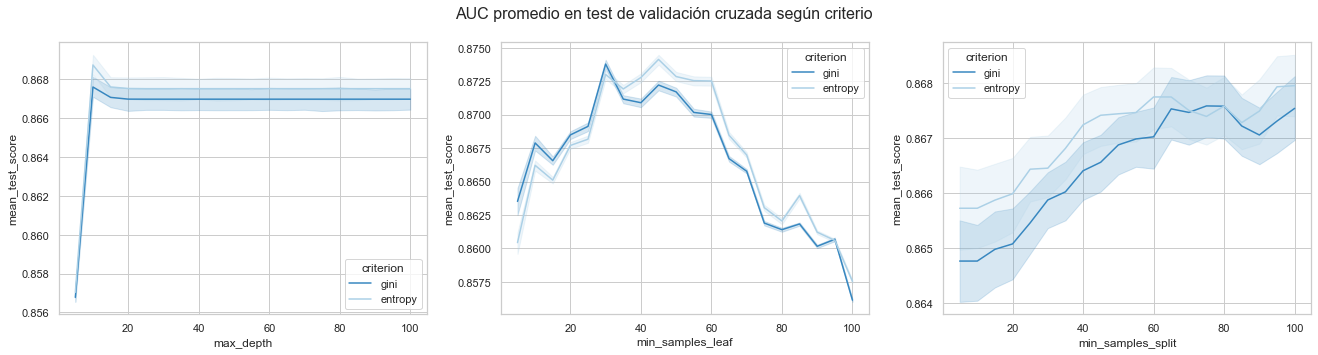

In [117]:
criterion_list = list(grid_search_dt.cv_results_['param_criterion'].data)
max_depth_list = list(grid_search_dt.cv_results_['param_max_depth'].data)
min_samples_leaf_list = list(grid_search_dt.cv_results_['param_min_samples_leaf'].data)
min_samples_split_list = list(grid_search_dt.cv_results_['param_min_samples_split'].data)
mean_test_score_list = list(grid_search_dt.cv_results_['mean_test_score'])

decision_tree_df = pd.DataFrame(list(zip(criterion_list, max_depth_list, min_samples_leaf_list, min_samples_split_list, mean_test_score_list)),
                                columns=['criterion', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'mean_test_score'])

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
fig.suptitle("AUC promedio en test de validación cruzada según criterio", fontsize=16)

sns.lineplot(data=decision_tree_df, x="max_depth", y="mean_test_score", hue="criterion", ax=axes[0], palette ='Blues_r')
sns.lineplot(data=decision_tree_df, x="min_samples_leaf", y="mean_test_score", hue="criterion", ax=axes[1], palette ='Blues_r')
sns.lineplot(data=decision_tree_df, x="min_samples_split", y="mean_test_score", hue="criterion", ax=axes[2], palette ='Blues_r')

plt.show()

Train vs Test en validacion cruzada

In [119]:
max_depth_list = list(grid_search_dt.cv_results_['param_max_depth'].data)
min_samples_leaf_list = list(grid_search_dt.cv_results_['param_min_samples_leaf'].data)
min_samples_split_list = list(grid_search_dt.cv_results_['param_min_samples_split'].data)
mean_train_score_list = list(grid_search_dt.cv_results_['mean_train_score'])
mean_test_score_list = list(grid_search_dt.cv_results_['mean_test_score'])

decision_tree_df = pd.DataFrame(list(zip(max_depth_list, min_samples_leaf_list, min_samples_split_list, mean_train_score_list, mean_test_score_list)),
                                columns=['max_depth', 'min_samples_leaf', 'min_samples_split', 'mean_train_score', 'mean_test_score'])

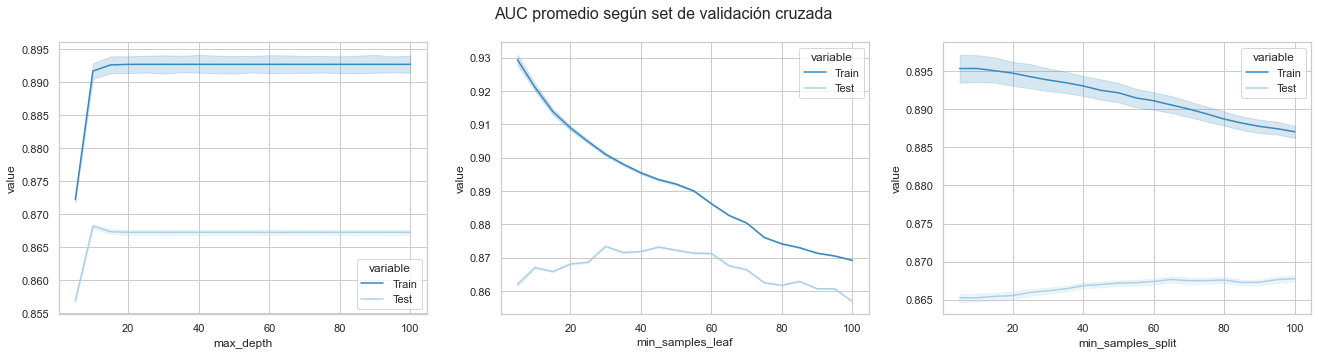

In [141]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
fig.suptitle("AUC promedio según set de validación cruzada", fontsize=16)

for i,param in enumerate(['max_depth', 'min_samples_leaf', 'min_samples_split']):
    df_melt = decision_tree_df.melt(id_vars=[param],value_vars= ['mean_train_score','mean_test_score'])
    df_melt.variable.replace({'mean_train_score':'Train',
                    'mean_test_score':'Test'},inplace=True)

    sns.lineplot(data=df_melt, x=param, y="value", hue="variable", ax=axes[i], palette ='Blues_r')

# Resultados CV test

In [148]:
results = cross_validate(
    grid_search_dt.best_estimator_,
    X_train,
    y_train,
    cv=kfold,
    scoring=['accuracy', 'precision', 'recall', "f1", "roc_auc"],
    return_train_score=False,
    n_jobs=-1
)

results_dt = pd.DataFrame(results)

In [151]:
mean_results = pd.DataFrame(results_dt.mean(axis=0), columns=['test_cv'])
mean_results

,test_cv
fit_time,0.01
score_time,0.03
test_accuracy,0.82
test_precision,0.76
test_recall,0.66
test_f1,0.70
test_roc_auc,0.88


In [153]:
mean_results.to_csv('../data/cv_results/decision_tree.csv', index=False)

# Resultados test

In [142]:
preds = grid_search_dt.predict(X_test)
print(classification_report(y_test,preds))
print(roc_auc_score(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       603
           1       0.75      0.65      0.70       297

    accuracy                           0.81       900
   macro avg       0.80      0.77      0.78       900
weighted avg       0.81      0.81      0.81       900

0.7726770189456758


# Guardamos modelo y resultados

In [14]:
resultados_dict = {
    'AUC': roc_auc_score(y_test,preds),
    'Accuracy': accuracy_score(y_test,preds),
    'Recall': recall_score(y_test,preds),
    'Precision': precision_score(y_test,preds),
    'F1_score': f1_score(y_test,preds)
}

In [15]:
resultados = pd.DataFrame(resultados_dict,index=['Resultados en test']).T

In [143]:
resultados

,Resultados en test
AUC,0.77
Accuracy,0.81
Recall,0.65
Precision,0.75
F1_score,0.70


In [144]:
resultados.to_csv('../data/resultados/decision_tree.csv',index=False)

In [145]:
import pickle
pickle.dump(grid_search_dt, open('../data/modelos/decision_tree.pkl', 'wb'))